### Import the libraries

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

### Read the data

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


### Visualize the data

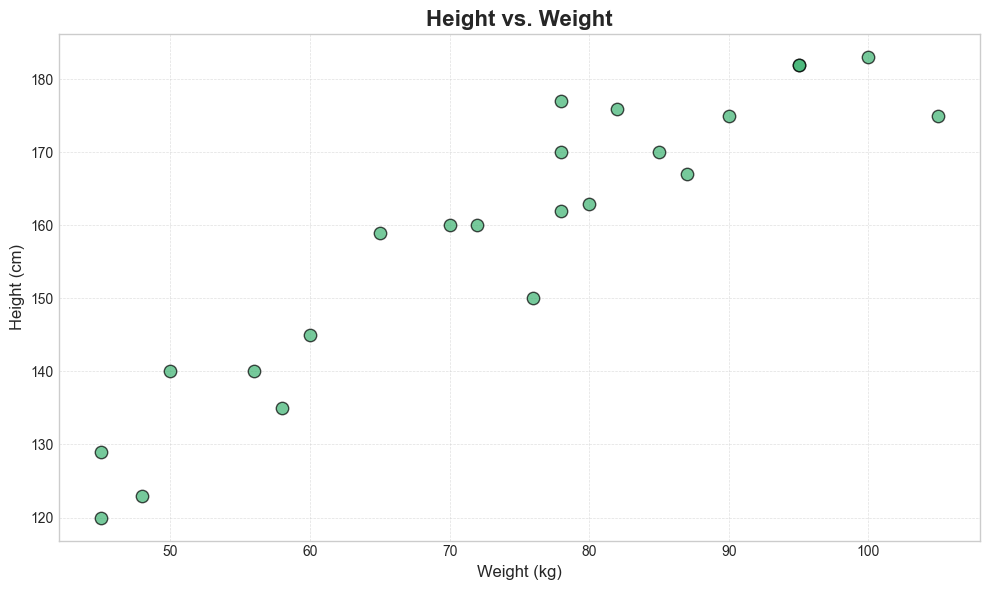

In [12]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'], 
            c='mediumseagreen', edgecolors='black', 
            alpha=0.7, s=80)

plt.title('Height vs. Weight', fontsize=16, fontweight='bold')
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show();

### Divide the features to independent and dependent features

In [27]:
X = df[['Weight']]
y = df['Height']

### Split the data into train and test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [30]:
len(X_train), len(X_test), len(y_train), len(y_test)

(18, 5, 18, 5)

### Standardize the data

In [33]:
scaler = StandardScaler()

In [34]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [35]:
scaled_X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

### Train simple linear regression model

In [40]:
lr_model = LinearRegression()

In [41]:
lr_model.fit(scaled_X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [44]:
print(f'The Sloap/Coefficient of the weight is: {lr_model.coef_}')
print(f"The Intercept of this is: {lr_model.intercept_}")

The Sloap/Coefficient of the weight is: [17.03440872]
The Intercept of this is: 157.5


### Best fit line

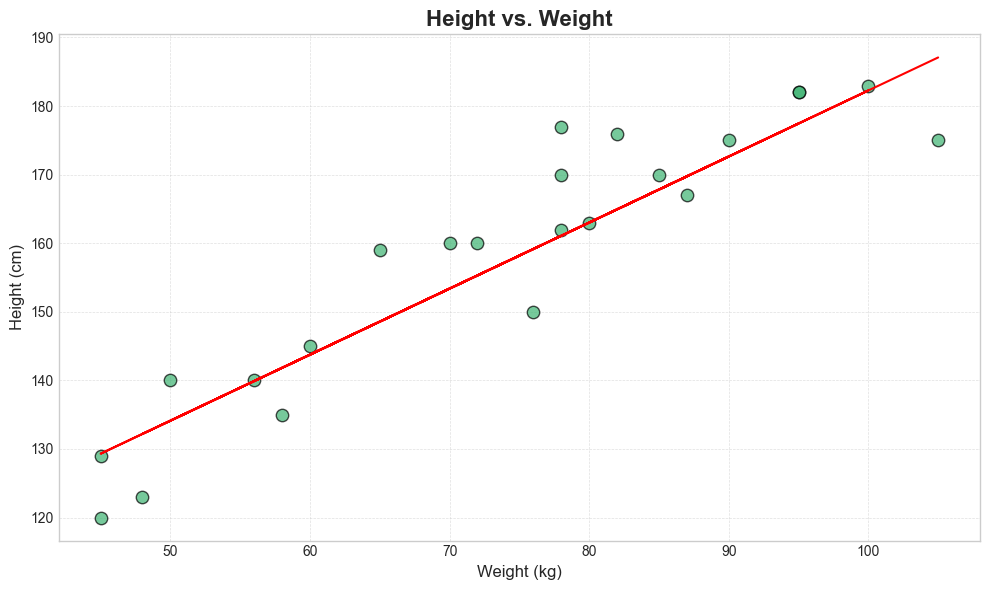

In [50]:
plt.style.use('seaborn-v0_8-whitegrid')

plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['Height'], 
            c='mediumseagreen', edgecolors='black', 
            alpha=0.7, s=80)
plt.plot(X_train, lr_model.predict(scaled_X_train), 'r')
plt.title('Height vs. Weight', fontsize=16, fontweight='bold')
plt.xlabel('Weight (kg)', fontsize=12)
plt.ylabel('Height (cm)', fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show();

In [52]:
y_pred_test = lr_model.predict(scaled_X_test)

In [53]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [54]:
y_pred_test, y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

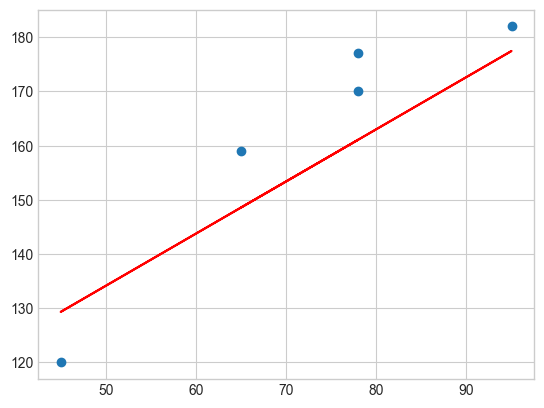

In [55]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr_model.predict(scaled_X_test), 'r')

### performanc metriecs

In [59]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_test)


# Adjusted R²
n = len(y_test)           # number of observations
p = X_test.shape[1]       # number of predictors/features
a_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

In [62]:
metrices = pd.DataFrame({'MSE':mse, 'MAE':mae, 'RMSE':rmse, 'R2 Score':r2, 'Adjusted R2 score':a_r2}, index=['LR Model'])
metrices

,MSE,MAE,RMSE,R2 Score,Adjusted R2 score
LR Model,109.775926,9.822658,10.477401,0.776987,0.702649


### Test the model with new custom data

In [67]:
new_weight = 80

# We always need to scale the data first using the scaler we used for our model training
scaled_new_weight = scaler.transform([[new_weight]])
scaled_new_weight

C:\Users\hidel\anaconda3\envs\mlpracticeenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [68]:
lr_model.predict(scaled_new_weight)

array([163.01076266])

### Assumptions of the model

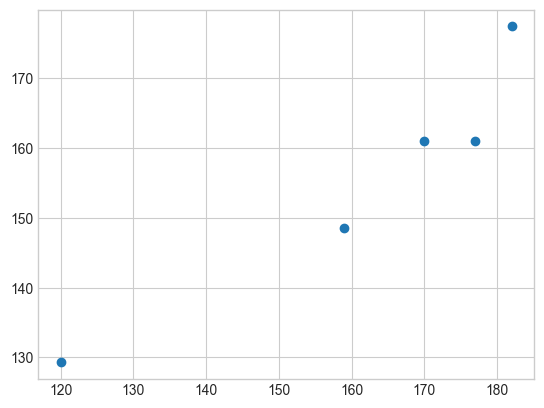

In [69]:
# Plot a scatter plot for the predicitons
plt.scatter(y_test, y_pred_test)

#### As we can see the points are linearly distributed, that means we have done a good model

####  Residuals

In [70]:
# Check residuals
residuals = y_test - y_pred_test
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

C:\Users\hidel\AppData\Local\Temp\ipykernel_15964\821817572.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, kde=True)


<Axes: xlabel='Height', ylabel='Density'>

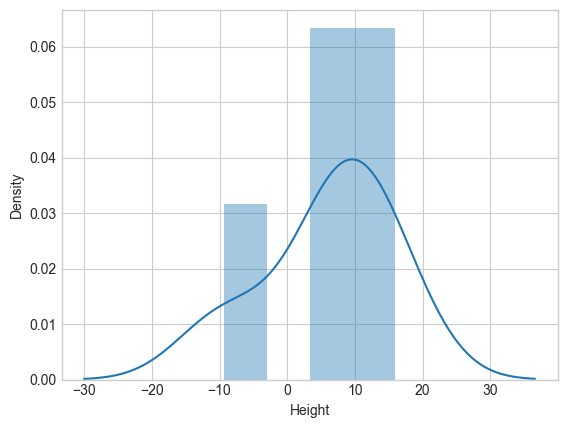

In [74]:
# Plot residuals
sns.distplot(residuals, kde=True)

#### In here we get a kind of a normal distribution . so this was a good model

#### Scatter plot with predictions and residuals


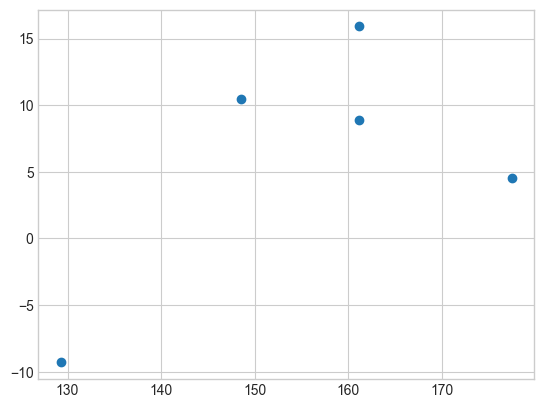

In [75]:
plt.scatter(y_pred_test, residuals)

#### This should be a uniform distribution, meaning the data points should be here and there. there should not be a pattern
#### Since this not follow a pattern this is a goood model

### Pickling the model

In [79]:
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)

In [80]:
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

### Load the pickled model

In [81]:
with open('linear_regression_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [82]:
with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)